<a href="https://colab.research.google.com/github/ZackPashkin/ocr_pytorch/blob/main/data_visualization_%2B_vs_code_github_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSH connection to google colab GPU instance

In [1]:
#@title Mount permanent storage
def mount_storage():
  from google.colab import auth
  import os
  auth.authenticate_user()
  !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
  !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
  !apt -qq update
  !apt -qq install gcsfuse
  os.makedirs("handwritten_rus",exist_ok=True)
  # bucket name only name without prefix gs:// 
  #for example if bucket name is gs://helloworld then 
  !gcsfuse handwritten_rus handwritten_rus
  #now you should be able to read/write to dir_name as for usual folder
  print("mounted to /content/mounted_storage")
mount_storage()

!ls /content/handwritten_rus

!touch /content/handwritten_rus/test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1974  100  1974    0     0  58058      0 --:--:-- --:--:-- --:--:-- 59818
OK
15 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 22.9 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.32.0_amd64.deb ...
Unpacking gcsfuse (0.32.0) ...
Setting up gcsfuse (0.32.0) ...
Using mount point: /content/handwritten_rus
Opening GCS connection...
Mounting file system...
File system has been successfully mounted.
mounted to /content/mounted_storage
Arina.zip			 kovshov.zip		     test1.txt
captcha_images_v

In [2]:
#@title Setup tunnel for ssh from vscode 

#1 - setup ssh/user 


#Generate a random root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(30))


#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null

#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config

print("username: root")
print("password: ", password)

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')



! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip

# 3 - setup Ngrok - authtoken

#Ask token
print("Get your authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
print('https://dashboard.ngrok.com/status/tunnels')


Creating config file /etc/ssh/sshd_config with new version
Creating SSH2 RSA key; this may take some time ...
2048 SHA256:g5QtzqqiBQL7ftqLPRuZ1LLTBPx3rxLiHGMZfP/4GPU root@0d4430fa6320 (RSA)
Creating SSH2 ECDSA key; this may take some time ...
256 SHA256:TsstTzbL/UTjG+kfPOs49kAl5ydkrHI0uqznLKb/mFQ root@0d4430fa6320 (ECDSA)
Creating SSH2 ED25519 key; this may take some time ...
256 SHA256:wyFitNDL1w94EDyJzBsn4dGbeCm0430Uxaf/AiRBego root@0d4430fa6320 (ED25519)
Created symlink /etc/systemd/system/sshd.service → /lib/systemd/system/ssh.service.
Created symlink /etc/systemd/system/multi-user.target.wants/ssh.service → /lib/systemd/system/ssh.service.
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
username: root
password:  tMe55FjKIhOnSBM0367ZLRKw1UyJOR
Get your authtoken from https://dashboard.ngrok.com/auth
··········
https://dashboard.ngrok.com/status/tunnels


In [3]:
#@title Format link for ssh connection

# copy from here https://dashboard.ngrok.com/status/tunnels
#tcp://2.tcp.ngrok.io:10147

#vscode remote ssh format:
#root@2.tcp.ngrok.io:17892
#enter password from above

# format tunnel link for vscode
TUNNEL_LINK = input("Input link from https://dashboard.ngrok.com/status/tunnels: ")
TUNNEL_LINK = TUNNEL_LINK.replace('tcp://', 'root@')
print(TUNNEL_LINK)
print("password: ", password)
print('\x1b[6;30;42m' + f"Open Remote SSH: Connect to host in vscode \n\n and pass {TUNNEL_LINK}"  + '\x1b[0m')
print('\x1b[6;30;42m' + f"Then press continue and enter password {password}"  + '\x1b[0m')

Input link from https://dashboard.ngrok.com/status/tunnels: tcp://0.tcp.ngrok.io:14380
root@0.tcp.ngrok.io:14380
password:  tMe55FjKIhOnSBM0367ZLRKw1UyJOR
Open Remote SSH: Connect to host in vscode 

 and pass root@0.tcp.ngrok.io:14380
Then press continue and enter password tMe55FjKIhOnSBM0367ZLRKw1UyJOR


In [ ]:
# enable nvidia-smi
export LD_PRELOAD=/usr/lib64-nvidia/libnvidia-ml.so
nvidia-smi

In [ ]:
# create project on github and clone
# configure git
~/ocr_pytorch# git config --global user.email xxx@gmail.com
~/ocr_pytorch# git config --global user.name "xxx"

In [ ]:
# add extentions for vscode
# tabnine
# Press Cmd+P in your Visual Studio Code, paste the following command, and press Enter.
# ext install TabNine.tabnine-vscode
# add python interpreter

In [13]:
#to prevent colab shutdown
import time 
time.sleep(1000000000)

KeyboardInterrupt: ignored

# Visualize data

In [4]:
!wget https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_601263__05-12-2020.tsv
!wget https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_615470__05-12-2020.tsv
!wget https://storage.googleapis.com/handwritten_rus/werner.zip
!unzip /content/werner.zip 

--2020-12-06 04:52:18--  https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_601263__05-12-2020.tsv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 172.217.218.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152797 (149K) [text/tab-separated-values]
Saving to: ‘assignments_from_pool_601263__05-12-2020.tsv’

assignments_from_po 100%[===================>] 149.22K  --.-KB/s    in 0.001s  

2020-12-06 04:52:18 (132 MB/s) - ‘assignments_from_pool_601263__05-12-2020.tsv’ saved [152797/152797]

--2020-12-06 04:52:18--  https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_615470__05-12-2020.tsv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443

In [5]:
import os
import pandas as pd

df_part1 = pd.read_csv("/content/assignments_from_pool_601263__05-12-2020.tsv", delimiter='\t' )
df_part2 = pd.read_csv("/content/assignments_from_pool_615470__05-12-2020.tsv", delimiter='\t' )
df = df_part1.append(df_part2, ignore_index=True)

labels_dict = {}
for image_name in os.listdir("/content/werner"):
  label = df.loc[df["INPUT:image"] == "".join(("/HANDWRITTEN/werner_1000_part_1_181120/", image_name)), "OUTPUT:output"]
  label = label.tolist()
  if label != []: 
    labels_dict.update({image_name:label[0]})
labels_dict

{'1.png': 'Значение принятия христианства',
 '10.png': 'равные права',
 '100.png': 'чему-то',
 '1000.png': 'связь с ТК РФ',
 '101.png': 'Что надо знать',
 '102.png': 'исходя из',
 '103.png': 'Применение норм',
 '104.png': 'Особенная часть',
 '105.png': 'УК',
 '106.png': 'Конституция РФ',
 '116.png': 'определенном порядке',
 '117.png': 'образуют систему.',
 '118.png': 'норм',
 '119.png': 'объектов,',
 '12.png': '14. Исторический процесс',
 '120.png': 'объект',
 '121.png': 'Убийство',
 '122.png': 'выгоды',
 '123.png': 'группой лиц',
 '124.png': 'Субъектом',
 '125.png': 'в любой форме',
 '126.png': 'строя РФ',
 '127.png': 'охрана',
 '128.png': 'воздействия',
 '129.png': '№162-ФЗ',
 '13.png': 'простая форма устройства',
 '130.png': 'ответить на вопрос',
 '131.png': 'преступление.',
 '132.png': 'потребителей.',
 '133.png': 'вводят спец. норму',
 '134.png': 'ложную рекламу',
 '135.png': 'преступления',
 '136.png': 'С учетом ФЗ',
 '137.png': 'наказуемое деяние',
 '138.png': 'в зависимости от'

In [20]:
import sys
sys.path.append("/content/ocr_pytorch/src")
from config import *
from dataset import *
from train import *
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:


(
    train_img,
    test_img, 
    train_labels, 
    test_labels, 
    train_orig_labels, 
    test_orig_targets,
)   =model_selection.train_test_split(
        IMAGES, LABELS_ENCODED, LABELS_NAMES, test_size=0.1, random_state=2020)

train_dataset = OcrDataset(image_path=train_img, 
                            labels=train_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)


test_dataset = OcrDataset(image_path=test_img, 
                            labels=test_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)
    

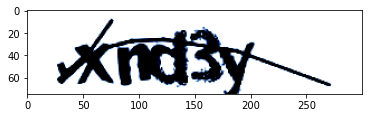

In [22]:

np_img = train_dataset[80]["images"].numpy()
np_img  = np.transpose(np_img, (1,2,0))
plt.imshow(np_img)